In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model


In [2]:
data = pd.read_csv('property-price.csv')
data

,Area (sqr ft),Bedroom,Age,Price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,3.5,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [3]:
x = data.drop('Price',axis=1)
y = data.Price

In [4]:
x

,Area (sqr ft),Bedroom,Age
0,2600,3.0,20
1,3000,4.0,15
2,3200,3.5,18
3,3600,3.0,30
4,4000,5.0,8


In [5]:
y

0    550000
1    565000
2    610000
3    595000
4    760000
Name: Price, dtype: int64

In [6]:
model= linear_model.LinearRegression()
model.fit(x,y)

LinearRegression()

In [7]:
model.coef_

array([    198.47159002, -116583.73881651,  -14267.77585936])

In [8]:
model.intercept_

656046.539004866

In [9]:
predictions = model.predict(x)
data['Predictions']=predictions
data

,Area (sqr ft),Bedroom,Age,Price,Predictions
0,2600,3.0,20,550000,536965.939413
1,3000,4.0,15,565000,571109.715900
2,3200,3.5,18,610000,626292.575734
3,3600,3.0,30,595000,592759.770837
4,4000,5.0,8,760000,752871.998116


In [23]:
from sklearn.metrics import r2_score
R2 = r2_score(data[['Price']],data[['Predictions']])
print("R2:",R2)

R2: 0.9812392465259163


In [17]:
from sklearn import metrics 
print("MSE:",metrics.mean_squared_error(data[['Price']],data[['Predictions']]))

MSE: 105698085.07298715


In [18]:
print("RMSE:",np.sqrt(metrics.mean_squared_error(data[['Price']],data[['Predictions']])))

RMSE: 10280.957400601714


In [20]:
model.predict([[3000,4,15]])

C:\ProgramData\Anaconda3\envs\Py310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([571109.71590017])

In [22]:
model.predict([[3100,3.5,18]])

C:\ProgramData\Anaconda3\envs\Py310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([606445.41673207])

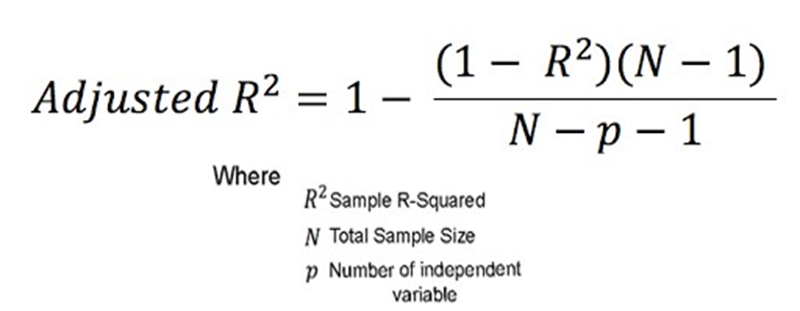

In [38]:
AdjustedR2 = 1 -(((1-R2)*(data.shape[0]-1))/(data.shape[0]-3-1))

In [39]:
AdjustedR2

0.9249569861036653

In [45]:
adj_r2 = 1-((1-R2)*(5-1)/(5-3-1))
adj_r2

0.9249569861036653

0.9199999999999999